<span style="font-size: 36px;color: teal; font-family: TimesNewRoman;">Importing necessary libraries and the dataset<span>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn import metrics
from sklearn.metrics import classification_report
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target_names.shape

(10,)

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
digits.data.shape

(1797, 64)

In [10]:
digits.images.shape

(1797, 8, 8)

<span style="font-size: 60px;color: teal; font-family: TimesNewRoman;">K Nearest Neighbor Classification<span>

<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">If we want to use the digits.images (1797,8,8) data then we need to flatten the image (or) We can use directly digits.data (1797,64)<span>

In [11]:
# Length of each image is (8x8). So we need to flatten the image to (64x1).
print("The total number of images and the length of an image before flattenning is: "+ str(digits.images.shape))
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print("The total number of images and the length of an image after flattenning is: "+ str(data.shape))
# As we have digits.data containing the (64,) shape, so we do not need to flatten the matrix.

The total number of images and the length of an image before flattenning is: (1797, 8, 8)
The total number of images and the length of an image after flattenning is: (1797, 64)


In [12]:
# Creating a dataframe using pandas
df = pd.DataFrame(digits.data,digits.target)
df.shape


(1797, 64)

In [13]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [18]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df.target,test_size = 0.5, shuffle = False)
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.0,1.0,13.0,16.0,16.0,16.0,12.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,15.0,16.0,10.0,0.0,0.0,0.0
7,0.0,0.0,6.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0
9,0.0,0.0,2.0,10.0,13.0,12.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,16.0,14.0,0.0,0.0
5,0.0,1.0,12.0,12.0,15.0,16.0,7.0,0.0,0.0,7.0,...,0.0,0.0,0.0,3.0,15.0,16.0,5.0,0.0,0.0,0.0


In [15]:
len(y_train)

898

<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">Creating two functions for applying K-NearestNeighbor <li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Calculating the Euclidean Distance as a distance metric<li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Predicting the class of the query point from X_test<span>

In [16]:
 # Choosing Euclidean distance as a distance metric (row_wise)
# Numpy arrays are more capable for doing element-wise operations
def euclidean_distance(row1,row2,axis=1):
    distance = np.sum((row1 - row2) ** 2, axis=1)
    return np.sqrt(distance)

# KNN algortithm
def KNN(train,test,y_train,k):
    train = train.to_numpy() # Converting all the inputs into numpy arrays for easy operations
    test = test.to_numpy()
    y_train = y_train.to_numpy()
    predicted = []  # Creating an empty list to store the predicted label
    for test_row in test:
        distances = euclidean_distance(train,test_row,axis=1)
        sorted_indices = np.argsort(distances)   # Sort the distances using its indices
        nearest_indices = sorted_indices[:k]
        nearest_labels = y_train[nearest_indices]  
        predicted_count = np.bincount(nearest_labels)  # Counts the occurences of each integer from 0 to 9 in nearest_label
        predicted_label = np.argmax(predicted_count)   # Determines the maximum number of occurences
        predicted.append(predicted_label)
    
    return predicted
    
        

<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">Confusion Matrix and Classification Report for k=1<span>

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  0 84  0  2  0  1  2  2]
 [ 0  0  0  0 87  0  0  0  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  4  0  2  0  0  0  0 81  1]
 [ 0  0  0  4  0  2  0  0  0 86]]


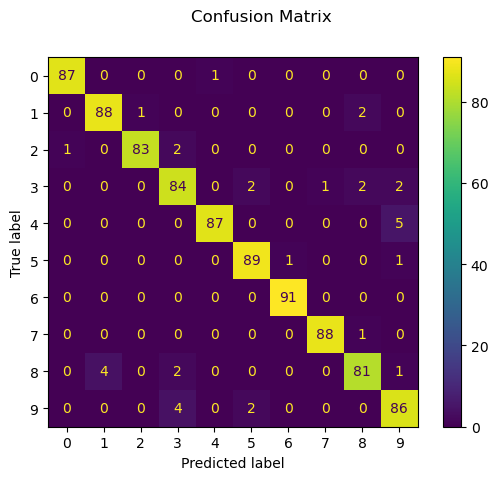

In [17]:
# For k=1
y_predicted = KNN(X_train,X_test,y_train,1)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [206]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.96      0.97      0.96        91
           2       0.99      0.97      0.98        86
           3       0.91      0.92      0.92        91
           4       0.99      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.99      0.99      0.99        89
           8       0.94      0.92      0.93        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">Confusion Matrix and Classification Report for k=3<span>

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 84  0  1  0  2  2  1]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  2  1  1  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]


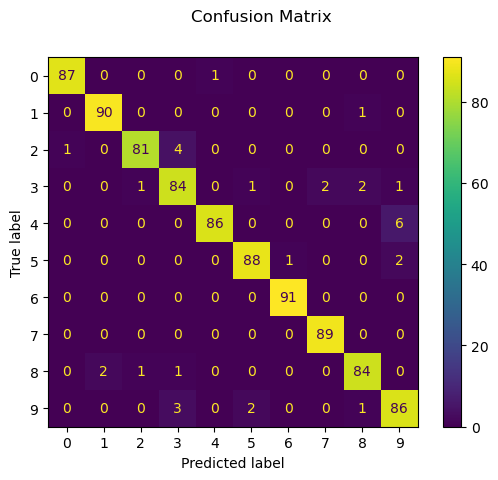

In [176]:
# For k=3
y_predicted = KNN(X_train,X_test,y_train,3)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [177]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.99      0.98        91
           2       0.98      0.94      0.96        86
           3       0.91      0.92      0.92        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      1.00      0.99        89
           8       0.95      0.95      0.95        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">Confusion Matrix and Classification Report for k=5<span>

Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0  0  0 87  0  0  1  0  4]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  5  1  1  0  0  0  1 79  1]
 [ 0  0  0  4  0  2  0  0  1 85]]


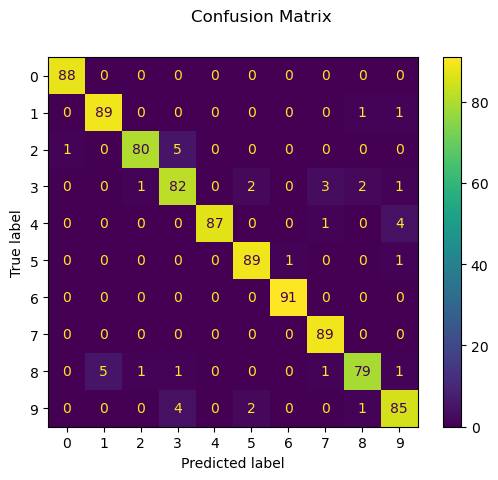

In [179]:
# For k=5
y_predicted = KNN(X_train,X_test,y_train,5)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [180]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">Confusion Matrix and Classification Report for k=100<span>

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 66  9  5  0  1  0  0  1  9]
 [ 1  0 74 11  0  0  0  0  0  0]
 [ 0  0  0 81  0  2  0  5  3  0]
 [ 4  0  0  0 85  0  0  2  1  0]
 [ 0  0  0  2  0 76  3  0  0 10]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  2  0  0  0  0 87  0  0]
 [ 0  2  2  7  0  5  1  2 65  4]
 [ 1  0  0  6  0  5  0  1  0 79]]


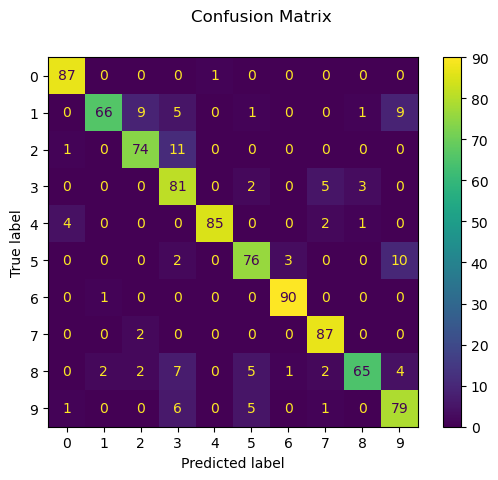

In [182]:
# For k=100
y_predicted = KNN(X_train,X_test,y_train,100)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [183]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        88
           1       0.96      0.73      0.83        91
           2       0.85      0.86      0.86        86
           3       0.72      0.89      0.80        91
           4       0.99      0.92      0.96        92
           5       0.85      0.84      0.84        91
           6       0.96      0.99      0.97        91
           7       0.90      0.98      0.94        89
           8       0.93      0.74      0.82        88
           9       0.77      0.86      0.81        92

    accuracy                           0.88       899
   macro avg       0.89      0.88      0.88       899
weighted avg       0.89      0.88      0.88       899



<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">Confusion Matrix and Classification Report for k=500<span>

Confusion matrix:
[[86  0  0  0  1  0  1  0  0  0]
 [ 3  6 29  9  6  0 13  0 17  8]
 [ 2  0 24 52  0  0  7  0  1  0]
 [ 1  0  1 80  0  2  0  3  4  0]
 [26  0  1  0 40  2 20  2  1  0]
 [11  0  0 21  0 51  5  0  0  3]
 [ 8  1  0  0  0  0 82  0  0  0]
 [ 0  0  3  3  4  4  0 59 16  0]
 [ 6  0  9 19  2 12  4  1 33  2]
 [14  0  0 67  0  5  0  1  0  5]]


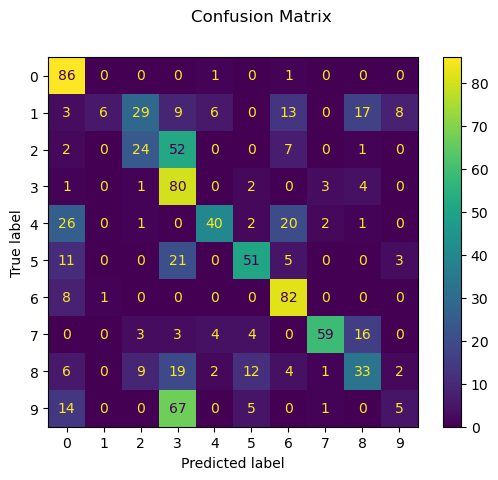

In [185]:
# For k=500
y_predicted = KNN(X_train,X_test,y_train,500)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [186]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.98      0.70        88
           1       0.86      0.07      0.12        91
           2       0.36      0.28      0.31        86
           3       0.32      0.88      0.47        91
           4       0.75      0.43      0.55        92
           5       0.67      0.56      0.61        91
           6       0.62      0.90      0.74        91
           7       0.89      0.66      0.76        89
           8       0.46      0.38      0.41        88
           9       0.28      0.05      0.09        92

    accuracy                           0.52       899
   macro avg       0.58      0.52      0.48       899
weighted avg       0.58      0.52      0.48       899



<span style="font-size: 60px;color: teal; font-family: TimesNewRoman;">Gaussian Naive Bayes Classification<span>

In [19]:
# Converting the dataframe into the respective numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()

<span> <li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Calculating the prior probability P(C)<li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Calculating the class means and variances <li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Handling zero variances as smoothing to reduce inconsistancies<span><li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Calculating and predicting the posterior probability<span>

In [20]:
# Calculate class priors
class_priors = np.bincount(y_train) / len(y_train)

# Calculate class means and variances
class_means = np.array([np.mean(X_train[y_train == c], axis=0) for c in range(10)])
class_variances = np.array([np.var(X_train[y_train == c], axis=0) for c in range(10)])

# Handle zero variances
class_variances[class_variances == 0] = 1e-9  # Set small non-zero value for zero variances

# Calculate log likelihoods
log_likelihoods = np.array([norm.logpdf(X_test, loc=class_means[c], scale=np.sqrt(class_variances[c])) for c in range(10)])

# Calculate log posterior probabilities
log_posterior_probs = log_likelihoods.sum(axis=2).T + np.log(class_priors)

# Make predictions
predictions = np.argmax(log_posterior_probs, axis=1)

<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">Confusion Matrix and Classification Report for 50% of training data and 50% of testing data<span>

Confusion matrix:
[[84  0  0  0  0  2  0  0  1  1]
 [ 0 65  2  0  0  0  0  5 13  6]
 [ 0  8 70  0  0  1  2  0  5  0]
 [ 0  2  2 71  0  2  0  2 10  2]
 [ 3  0  0  0 58  0  1 28  1  1]
 [ 0  2  0  4  0 72  1  5  2  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  2  0  0 13  0 72  2  0]
 [ 0  2  5  0  0  8  0  5 67  1]
 [ 1  1  0 10  0  4  1  6 13 56]]


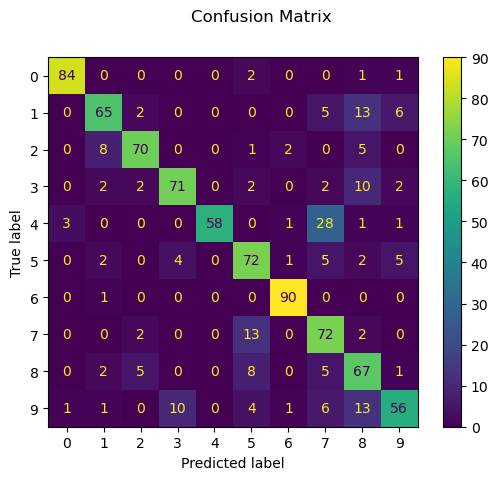

In [21]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.80      0.71      0.76        91
           2       0.86      0.81      0.84        86
           3       0.84      0.78      0.81        91
           4       1.00      0.63      0.77        92
           5       0.71      0.79      0.75        91
           6       0.95      0.99      0.97        91
           7       0.59      0.81      0.68        89
           8       0.59      0.76      0.66        88
           9       0.78      0.61      0.68        92

    accuracy                           0.78       899
   macro avg       0.81      0.79      0.79       899
weighted avg       0.81      0.78      0.79       899

